# Climate Scenarios Workflow Template  


Small tutorial on how to proudce a provenance document with information describing the execution of a workflow


## The Template

The template used in this notebook is avalable for consultation at the following URL.

https://openprovenance.org/store/documents/3170

This is an draft template. It can be extended depending on the traceability requirements for the CS.

The same template it is registred into the PROV-Template Catalogue and Expansion Service at

https://ec2-52-210-117-244.eu-west-1.compute.amazonaws.com/


## PROV-Template Background

More information on PROV-Template available at

https://eprints.soton.ac.uk/405025/1/provtemplate.pdf

The template are formulated adotping the PROV datamodel 

https://www.w3.org/TR/prov-dm/

and expressed inthe PROV-N synthax

https://www.w3.org/TR/prov-n/


## Software Requirements

listed into the environment.yaml file of this binder repository


## Obtain a Provenance Document (Binding)



The JSON is divided into 8 sections

1. The User that started the analysis
2. The Software used to launch the workflow 
3. The Workflow as a whole (collection of one of more scripts) and its general input. 
To cover a larger analysis we can chain multiple tools in a so called workflow. The expansion shows how more tools are referred 
4. When and the Workflow was executed and for how long it run.
The ID of the execution is generated within the binding with a *var* to facilatate our control on how we choose and manage the identification of the runs.
5. Input Data 
6. Namespaces Context (prefixes and reference vocabularies)


In [1]:
import uuid
import socket
myhost=socket.gethostname()


json_string="""
{

  "var" : {
   
   
   "user":[{"@id": "http://orcid.org/0000-0002-3494-120X"}],
   "name":["Alessandro Spinuso"],
   
   
   
   "executionSoftware":[{"@id":"uuid:"""+str(myhost)+""""}],
   "softwareType":["knmi-cs:Terminal"],
   
   
   "Workflow":[{"@id":"uuid:91991554jj"}],
   "documentationwf" : ["https://gitlab.com/KNMI/rdwd/climate-scenarios-2021/normals"],
   "tool":[{"@id":"uuid:klimaatnormaal1000"},{"@id":"uuid:919915dd"}],
   
   "WFExecution": [{"@id":"uuid:"""+str(uuid.uuid1())+""""}],
   "wfstart": ["2019-06-07T15:58:58Z"],
   "wfend":["2019-06-07T16:58:58Z"],
   
   "input": [{"@id":"uuid:91991554"}],
   "accessUrlInp":["https://data.knmi.nl/9199194","https://data.knmi.nl/9199192"],
   "coverageIn" :["2007-03-01T13:00:00Z/2008-05-11T15:30:00Z"],

   
   "startedAt":["2019-06-07T15:51:58Z"],
   "executionStartTime": ["2019-06-07T15:58:58Z"],
   "executionEndTime":["2019-06-07T16:58:58Z"]

   
  
  },
  "context" : {
     "uuid": "urn:uuid:",
     "http": "http:",
     "knmi-cs":"http://cs.knmi.nl/ns#"
  }
}
"""

  

 

### Execution of the Expansion as a service

The template is stored in a AWS deployed Proveance Template Service to allow its expansion. 
The script below refers to the template template_id and to the host_name of the service used for this demonstration.

The Provenance Catalgue's expansion service is invoked through a POST request.

In [2]:
import requests
from urllib.parse import urlencode, quote_plus


host_name = 'swirrl.climate4impact.eu/prov-template-catalog'
template_id ='5f2c1fde91f1cb305360862a'
#template_id = '5e96d5d191f1cb305360861b'


r = requests.post('https://' + host_name + '/api/templates/' + template_id + 
    '/expand?fmt=provjson&writeprov=false&bindver=v3',
        data=json_string, verify=False)

print(r.text)
import json
doc=json.loads(r.text)

for x in doc['bundle']:
    for y in doc['bundle'][x]['activity']:
        executionId=y
        
print(executionId)

{"prefix": {"provone": "http://purl.dataone.org/provone/2015/01/15/ontology#", "rdfs": "http://www.w3.org/2000/01/rdf-schema#", "knmi-cs": "http://cs.knmi.nl/ns#", "tmpl": "http://openprovenance.org/tmpl#", "swirrl": "http://swirrl.knmi.eu/ns#", "dcterms": "http://purl.org/dc/elements/1.1/", "xml": "http://www.w3.org/XML/1998/namespace", "vcard": "http://www.w3.org/2006/vcard/ns#", "http": "http:", "vargen": "http://openprovenance.org/vargen#", "var": "http://openprovenance.org/var#", "rdf": "http://www.w3.org/1999/02/22-rdf-syntax-ns#", "uuid": "urn:uuid:", "ns1": "http://purl.org/s-prov-v1-dev#"}, "bundle": {"uuid:6d7728eb-9a36-44b0-8209-3b55966da83e": {"prefix": {"uuid": "urn:uuid:", "provone": "http://purl.dataone.org/provone/2015/01/15/ontology#", "var": "http://openprovenance.org/var#", "dcterms": "http://purl.org/dc/elements/1.1/", "ns1": "http://purl.org/s-prov-v1-dev#", "vargen": "http://openprovenance.org/vargen#", "http": "http:", "vcard": "http://www.w3.org/2006/vcard/ns#"}

/Users/aspinuso2/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'swirrl.climate4impact.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


### Visualisation

Thanks to the https://pypi.org/project/prov/ module documents can be visualised as follows.

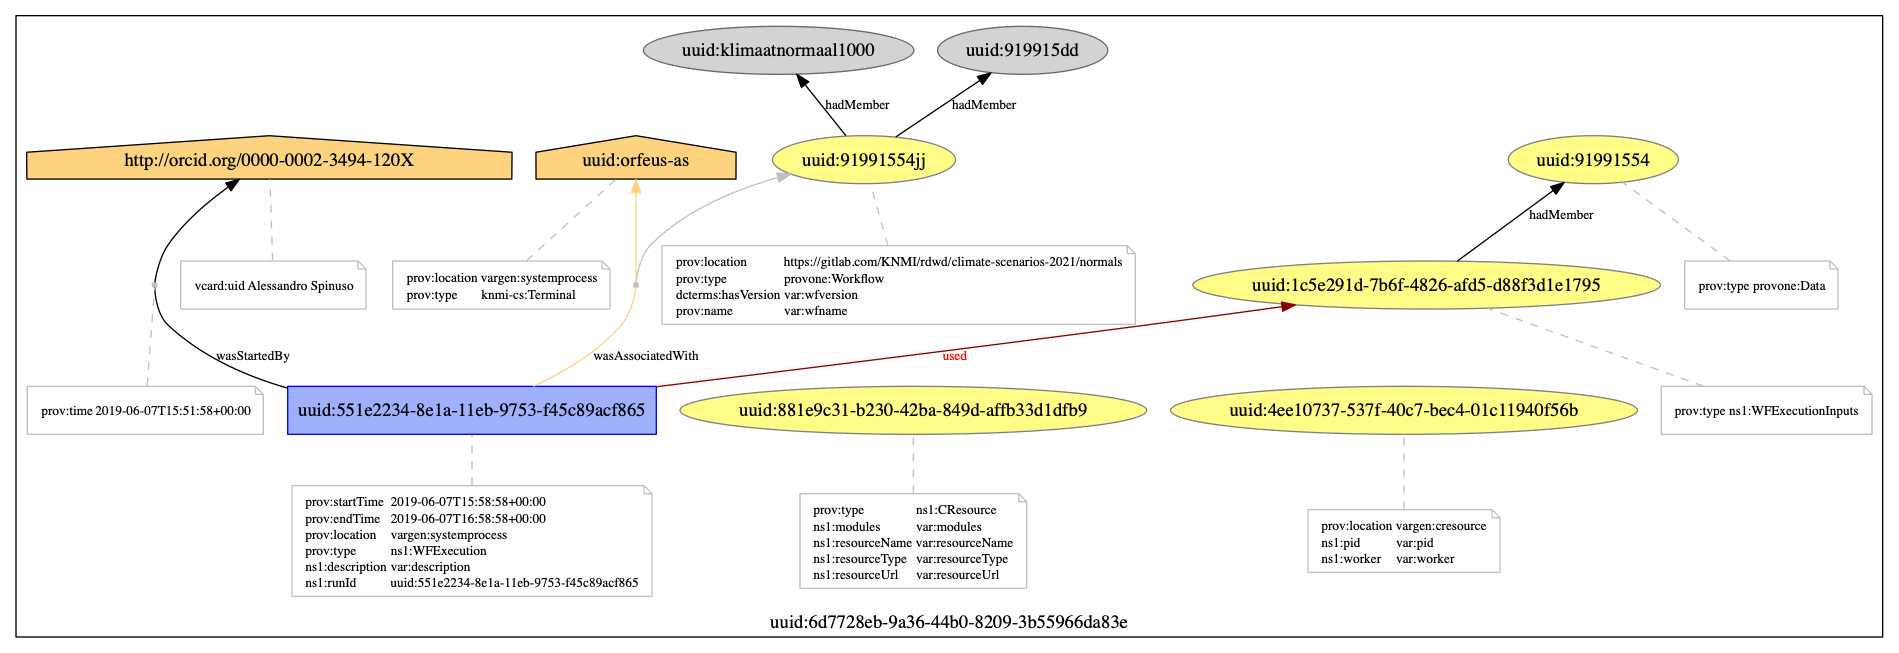

In [3]:
from prov.serializers.provjson import ProvJSONSerializer
from IPython.display import Image
import io
from prov.model import ProvDocument, ProvBundle, ProvException, first, Literal
from prov.dot import prov_to_dot


def provJSONtoFile(doc,executionId):
    name='PROV'+'_'+executionId+'.json'
    filep = open(name, 'w')
    filep.write(doc)
    filep.close()
    return name
    
    
   
def provJSONtoPNG(doc,executionId,format):
     
    
    doc=ProvJSONSerializer.deserialize(ProvJSONSerializer,doc)
    dot = prov_to_dot(doc)
    
    if format=="png":
        name='PROV'+'_'+executionId+'.png'
        dot.write_png(name)
        return name
    if format=="svg":
        name='PROV'+'_'+executionId+'.svg'
        dot.write_svg(name)
        return name
    
    

    
provJSONtoFile(r.text,executionId)

f = io.StringIO(r.text)
png_content=provJSONtoPNG(f,executionId,"png")
Image(png_content)



## Storing and Querying Provenance

Once the documents are produced they can be stored in a **Neo4J** Graph Database.

This is possible through a **Web API**, which is developed by the RDWD-DT. However it is not yet exposed for production use. 

Once the CS use cases are discussed, in order to define the type of queries or reports to be generated, we can extend the API and deploy the service for the CS. 
